## Import Library

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120

import warnings
warnings.filterwarnings('ignore')

## Load Price Data

In [90]:
import os
from pathlib import Path
notebook_path = os.getcwd()
algo_dir = Path(notebook_path).parent.parent
csv_file = str(algo_dir) + '/vn-stock-data/VN30ps/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    raw_data = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('Remote')
    raw_data = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [91]:
ticker_data = raw_data[["Open", "Close", "Low", "High", "Volume"]]
ticker_data

,Open,Close,Low,High,Volume
Date,,,,,
2018-08-13 09:00:00,943.5,943.1,942.9,943.6,1812
2018-08-13 09:05:00,943.1,943.3,942.9,943.5,1323
2018-08-13 09:10:00,943.2,943.1,942.6,943.3,1207
2018-08-13 09:15:00,943.1,942.6,942.3,943.1,1196
2018-08-13 09:20:00,942.6,943.7,942.4,943.7,1765
...,...,...,...,...,...
2024-10-25 09:20:00,1338.4,1337.7,1337.4,1338.6,4128
2024-10-25 09:25:00,1337.7,1337.7,1337.0,1338.0,2796
2024-10-25 09:30:00,1337.7,1336.2,1335.5,1338.0,4931


In [92]:
data = ticker_data[(ticker_data.index > '2020-11-01 00:00:00') & (ticker_data.index < '2024-01-01 00:00:00')]

In [93]:
def bar9h10(tick):
    tick = tick[(tick.index.hour == 9) & (tick.index.minute == 10)]
    if len(tick):
        return tick[0]


def bar14h25(tick):
    tick = tick[(tick.index.hour == 14) & (tick.index.minute == 25)]
    if len(tick):
        return tick[0]

In [94]:
def cal_pivot(row):
    pivot = (row['High_s'] + row['Low_s'] + row['Close_s']) / 3
    return pivot


def cal_r1(row):
    result = 2 * row['P'] - row['Low_s']
    return result


def cal_r2(row):
    result = row['P'] + row['High_s'] - row['Low_s']
    return result


def cal_r3(row):
    # result = row['P'] + 2 * (row['High_s'] - row['Low_s'])    # Classic
    result = row['P'] * 2 + row['High_s'] - 2 * row['Low_s']
    return result


def cal_r4(row):
    # result = row['P'] + 3 * (row['High_s'] - row['Low_s'])    # Classic
    result = row['P'] * 3 + row['High_s'] - 3 * row['Low_s']
    return result


def cal_r5(row):
    # result = row['P'] + 4 * (row['High_s'] - row['Low_s'])      # Classic
    result = row['P'] * 4 + row['High_s'] - 4 * row['Low_s']
    return result


def cal_r6(row):
    # result = row['P'] + 5 * (row['High_s'] - row['Low_s'])      # Classic
    result = row['P'] * 5 + row['High_s'] - 5 * row['Low_s']
    return result


def cal_s1(row):
    result = 2 * row['P'] - row['High_s']
    return result


def cal_s2(row):
    result = row['P'] - (row['High_s'] - row['Low_s'])
    return result


def cal_s3(row):
    # result = row['P'] - 2 * (row['High_s'] - row['Low_s'])  # Classic
    result = row['P'] * 2 - (2 * row['High_s'] - row['Low_s'])
    return result


def cal_s4(row):
    # result = row['P'] - 3 * (row['High_s'] - row['Low_s'])  # Classic
    result = row['P'] * 3 - (3 * row['High_s'] - row['Low_s'])
    return result


def cal_s5(row):
    # result = row['P'] - 4 * (row['High_s'] - row['Low_s'])  # Classic
    result = row['P'] * 4 - (4 * row['High_s'] - row['Low_s'])
    return result


def cal_s6(row):
    # result = row['P'] - 5 * (row['High_s'] - row['Low_s'])  # Classic
    result = row['P'] * 5 - (5 * row['High_s'] - row['Low_s'])
    return result


def cal_pivots(_1_d_df):
    _1_d_df['High_s'] = _1_d_df['High'].shift(1)
    _1_d_df['Low_s'] = _1_d_df['Low'].shift(1)
    _1_d_df['Close_s'] = _1_d_df['Close'].shift(1)
    _1_d_df['P'] = _1_d_df.apply(
        lambda row: cal_pivot(row), axis=1)
    _1_d_df['R1'] = _1_d_df.apply(
        lambda row: cal_r1(row), axis=1)
    _1_d_df['R2'] = _1_d_df.apply(
        lambda row: cal_r2(row), axis=1)
    _1_d_df['R3'] = _1_d_df.apply(
        lambda row: cal_r3(row), axis=1)
    _1_d_df['R4'] = _1_d_df.apply(
        lambda row: cal_r4(row), axis=1)
    _1_d_df['R5'] = _1_d_df.apply(
        lambda row: cal_r5(row), axis=1)
    _1_d_df['R6'] = _1_d_df.apply(
        lambda row: cal_r6(row), axis=1)
    _1_d_df['S1'] = _1_d_df.apply(
        lambda row: cal_s1(row), axis=1)
    _1_d_df['S2'] = _1_d_df.apply(
        lambda row: cal_s2(row), axis=1)
    _1_d_df['S3'] = _1_d_df.apply(
        lambda row: cal_s3(row), axis=1)
    _1_d_df['S4'] = _1_d_df.apply(
        lambda row: cal_s4(row), axis=1)
    _1_d_df['S5'] = _1_d_df.apply(
        lambda row: cal_s5(row), axis=1)
    _1_d_df['S6'] = _1_d_df.apply(
        lambda row: cal_s6(row), axis=1)
    return _1_d_df

In [95]:
data['Close_9h10'] = data['Close']
data['exit_price'] = data['Close']
day_data = data.resample('D').agg({
    'Open': 'first',
    'Close': 'last',
    'High': 'max',
    'Low': 'min',
    'Close_9h10': bar9h10,
    'exit_price': bar14h25
})
day_data.dropna(subset=['Close'], inplace=True)
day_data = cal_pivots(day_data)
day_data.dropna(inplace=True)

In [96]:
len(day_data)

788

In [97]:
day_data

,Open,Close,High,Low,Close_9h10,exit_price,High_s,Low_s,Close_s,P,...,R3,R4,R5,R6,S1,S2,S3,S4,S5,S6
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-03,909.3,908.3,910.8,903.7,908.8,908.5,907.0,895.4,904.0,902.133333,...,920.466667,927.2,933.933333,940.666667,897.266667,890.533333,885.666667,880.8,875.933333,871.066667
2020-11-04,909.0,912.3,918.1,906.7,908.9,913.5,910.8,903.7,908.3,907.600000,...,918.600000,922.5,926.400000,930.300000,904.400000,900.500000,897.300000,894.1,890.900000,887.700000
2020-11-05,913.7,910.2,919.9,910.0,913.6,910.8,918.1,906.7,912.3,912.366667,...,929.433333,935.1,940.766667,946.433333,906.633333,900.966667,895.233333,889.5,883.766667,878.033333
2020-11-06,911.2,908.3,912.7,903.3,911.9,910.0,919.9,910.0,910.2,913.366667,...,926.633333,930.0,933.366667,936.733333,906.833333,903.466667,896.933333,890.4,883.866667,877.333333
2020-11-09,914.2,923.0,923.0,913.8,914.6,921.5,912.7,903.3,908.3,908.100000,...,922.300000,927.1,931.900000,936.700000,903.500000,898.700000,894.100000,889.5,884.900000,880.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,1096.3,1115.0,1119.2,1096.3,1097.7,1114.9,1100.0,1093.3,1097.7,1097.000000,...,1107.400000,1111.1,1114.800000,1118.500000,1094.000000,1090.300000,1087.300000,1084.3,1081.300000,1078.300000
2023-12-26,1115.4,1121.5,1121.5,1113.4,1115.4,1117.2,1119.2,1096.3,1115.0,1110.166667,...,1146.933333,1160.8,1174.666667,1188.533333,1101.133333,1087.266667,1078.233333,1069.2,1060.166667,1051.133333
2023-12-27,1121.8,1116.9,1126.2,1116.9,1120.6,1118.0,1121.5,1113.4,1121.5,1118.800000,...,1132.300000,1137.7,1143.100000,1148.500000,1116.100000,1110.700000,1108.000000,1105.3,1102.600000,1099.900000


In [98]:
day_data.iloc[-1]

Open          1133.200000
Close         1134.600000
High          1139.500000
Low           1130.900000
Close_9h10    1134.400000
exit_price    1133.900000
High_s        1135.200000
Low_s         1117.000000
Close_s       1132.900000
P             1128.366667
R1            1139.733333
R2            1146.566667
R3            1157.933333
R4            1169.300000
R5            1180.666667
R6            1192.033333
S1            1121.533333
S2            1110.166667
S3            1103.333333
S4            1096.500000
S5            1089.666667
S6            1082.833333
Name: 2023-12-29 00:00:00, dtype: float64

In [99]:
day_data['rate_x'] = 100 * (day_data.P - day_data.Close.shift(1)) / day_data.Close.shift(1)
day_data['rate_y'] = (day_data.P - day_data.Close_9h10) / (
        day_data.High.shift(1) - day_data.Low.shift(1))
day_data['p_return'] = 1000 * (day_data.exit_price - day_data.P) / day_data.P
# risk_reward > should_long else shoutld think about short
day_data['risk_reward'] = (day_data.High - day_data.P) - (day_data.P - day_data.Low)

### Return Distributions

In [100]:
day_data['p_return'].describe()

count    788.000000
mean       0.444313
std       15.463787
min      -83.611533
25%       -6.429161
50%        1.393979
75%        8.454947
max       56.534787
Name: p_return, dtype: float64

In [101]:
day_data['return_group'] = pd.cut(day_data['p_return'], 30)
s1 = day_data.groupby(['return_group'])[['p_return']].count()
f1 = s1[['p_return']].rename(columns={'p_return': 'count'})
day_data.drop(columns=['return_group'], inplace=True)
f1

,count
return_group,
"(-83.752, -78.94]",1
"(-78.94, -74.268]",0
"(-74.268, -69.597]",0
"(-69.597, -64.925]",1
"(-64.925, -60.254]",3
"(-60.254, -55.582]",2
"(-55.582, -50.911]",2
"(-50.911, -46.239]",5
"(-46.239, -41.568]",4


In [102]:
day_data = day_data[(day_data['p_return'] > -30) & (day_data['p_return'] < 30)]

### Risk_Reward Distributions

In [103]:
day_data['risk_reward'].describe()

count    737.000000
mean       1.832429
std       19.821831
min      -68.666667
25%       -9.933333
50%        2.366667
75%       14.033333
max       60.800000
Name: risk_reward, dtype: float64

In [104]:
day_data['rr_group'] = pd.cut(day_data['risk_reward'], 30)
s2 = day_data.groupby(['rr_group'])[['risk_reward']].count()
f2 = s2[['risk_reward']].rename(columns={'risk_reward': 'count'})
day_data.drop(columns=['rr_group'], inplace=True)
f2

,count
rr_group,
"(-68.796, -64.351]",1
"(-64.351, -60.036]",2
"(-60.036, -55.72]",2
"(-55.72, -51.404]",2
"(-51.404, -47.089]",1
"(-47.089, -42.773]",3
"(-42.773, -38.458]",6
"(-38.458, -34.142]",13
"(-34.142, -29.827]",20


### Percent Distributions

In [105]:
day_data['rate_x'].describe()

count    736.000000
mean      -0.009661
std        0.503373
min       -3.423407
25%       -0.263454
50%       -0.012507
75%        0.240274
max        2.098884
Name: rate_x, dtype: float64

In [106]:
day_data['rate_y'].describe()

count    736.000000
mean      -0.063451
std        0.471920
min       -2.560000
25%       -0.340477
50%       -0.096856
75%        0.190212
max        3.437811
Name: rate_y, dtype: float64

In [107]:
day_data['rate_x_group'] = pd.qcut(day_data.rate_x, 20, duplicates='drop')
day_data['rate_y_group'] = pd.qcut(day_data.rate_y, 20, duplicates='drop')

In [108]:
len(day_data)

737

## Analysis

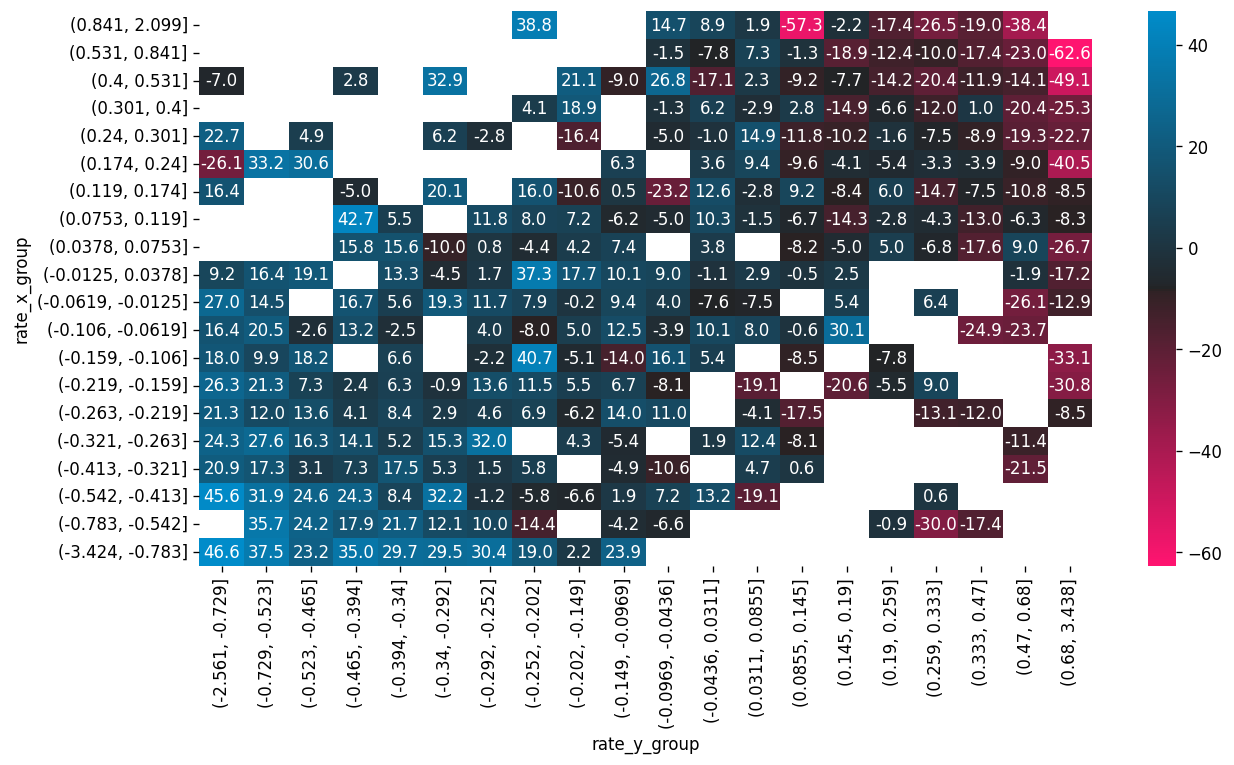

In [109]:
risk_reward_group = day_data.groupby(['rate_x_group', 'rate_y_group'])[['risk_reward']]
risk_reward_mean = risk_reward_group.mean().reset_index()
risk_reward_pivot = risk_reward_mean.pivot(index='rate_x_group', columns='rate_y_group', values='risk_reward').sort_index(ascending=False)
sns.heatmap(
    risk_reward_pivot,
    cmap=sns.diverging_palette(0, 240, s=100, l=55, center="dark", as_cmap=True),
    annot=True, fmt=".1f");

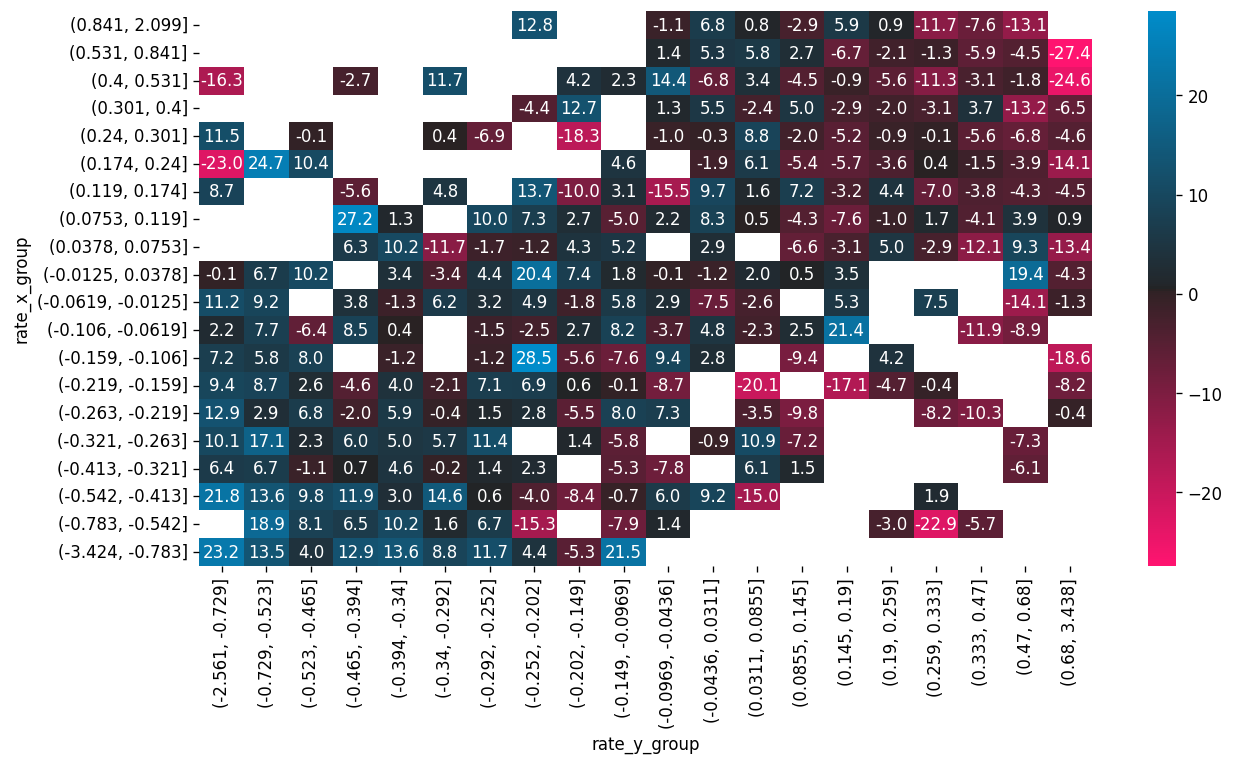

In [110]:
grpd = day_data.groupby(['rate_x_group', 'rate_y_group'])[['p_return']]
irs = grpd.mean().reset_index()
pivot_df = irs.pivot(index='rate_x_group', columns='rate_y_group', values='p_return').sort_index(ascending=False)
sns.heatmap(
    pivot_df,
    cmap=sns.diverging_palette(0, 240, s=100, l=55, center="dark", as_cmap=True),
    annot=True, fmt=".1f");

In [112]:
import pickle

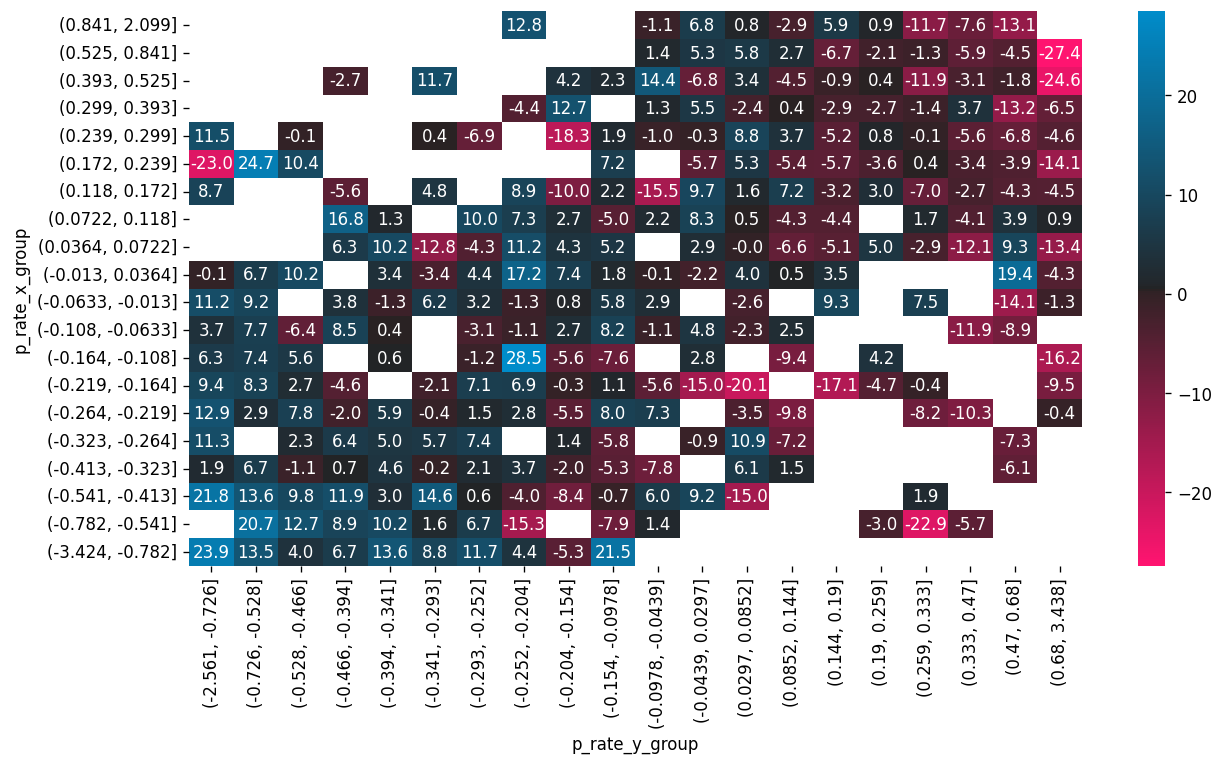

In [113]:
fibo_mean_return_db_file = str(algo_dir) + '/VN30ps/pivots/v2/p_mean_return_db.pkl'
is_file = os.path.isfile(fibo_mean_return_db_file)
if is_file:
    with open(fibo_mean_return_db_file, 'rb') as f:
        stored_pivot_df = pickle.load(f)
        sns.heatmap(
        stored_pivot_df,
        cmap=sns.diverging_palette(0, 240, s=100, l=55, center="dark", as_cmap=True),
        annot=True, fmt=".1f");
else:
    print(fibo_db_file)
    print('DB file not found.')

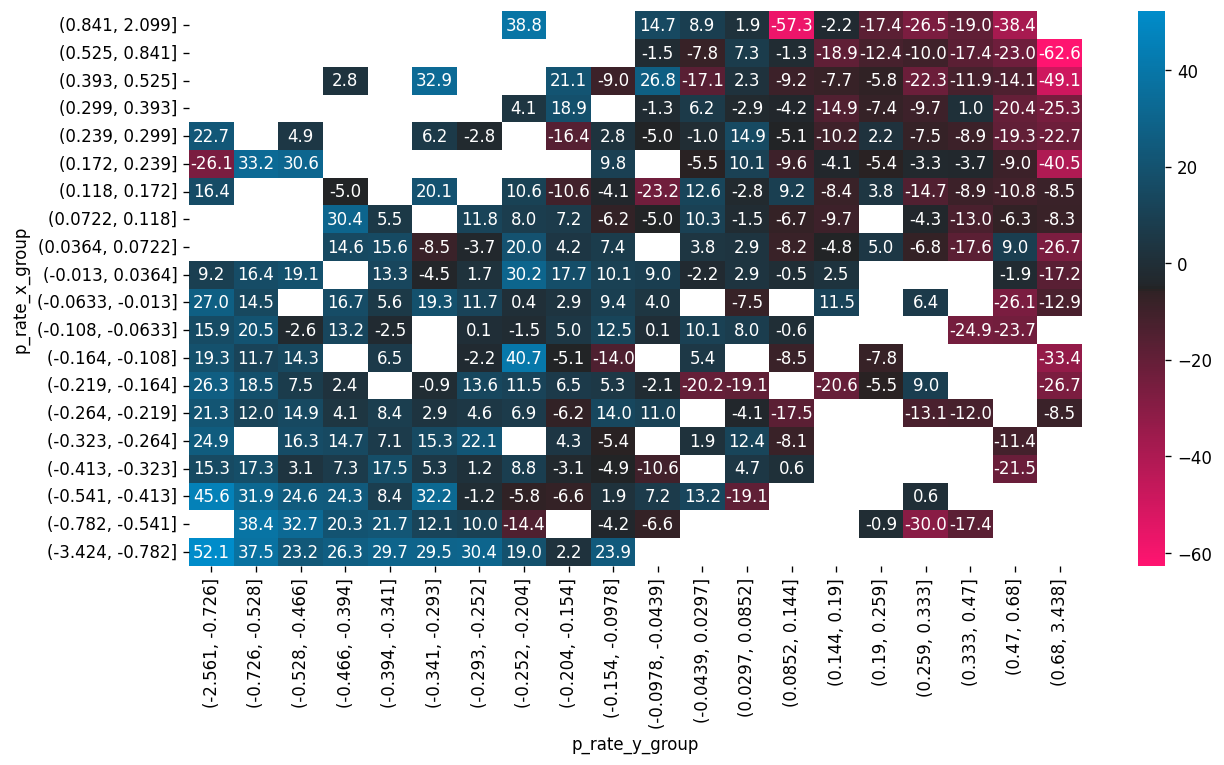

In [115]:
fibo_risk_reward_db_file = str(algo_dir) + '/VN30ps/pivots/v2/p_risk_reward_db.pkl'
is_file = os.path.isfile(fibo_risk_reward_db_file)
if is_file:
    with open(fibo_risk_reward_db_file, 'rb') as f:
        stored_pivot_df = pickle.load(f)
        sns.heatmap(
        stored_pivot_df,
        cmap=sns.diverging_palette(0, 240, s=100, l=55, center="dark", as_cmap=True),
        annot=True, fmt=".1f");
else:
    print(fibo_db_file)
    print('DB file not found.')

In [117]:
def find_mean_return(rate_x, rate_y, pivot_df):
    found_i = None
    for i in pivot_df.index:
        if i.left < rate_x <= i.right:
            found_i = i
            break
    found_c = None
    for c in pivot_df.columns:
        if c.left < rate_y <= c.right:
            found_c = c
            break
    found = pivot_df.loc[pivot_df.index == found_i, found_c]
    if len(found):
        val = found.values[0]
        return val